In [1]:
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import random_split, Subset
from torch.utils.data.dataloader import DataLoader
from torchvision.utils import make_grid
import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim
import torch
import matplotlib.pyplot as plt
import numpy as np


In [22]:
#train and test data directory
data_dir = "PetImages/Training"

dataset = ImageFolder(data_dir, transform = transforms.Compose([
    transforms.Resize((256,256)),
    transforms.ToTensor(),
    # transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
]))

img, lab = dataset[0]
print(img.shape, lab)

#Processing code
testn = len(dataset)
testn_train = 1000
train1, test1 = random_split(dataset, [testn_train, testn-testn_train])
print(len(train1))

n = len(train1)
n_train = int(0.7 * n)
train, test = random_split(train1, [n_train, n-n_train])


#Loading training and testing set into batches
train_dl = DataLoader(train, batch_size=50, num_workers=0, shuffle=True)
test_dl = DataLoader(test, batch_size=50, num_workers=0, shuffle=False)


torch.Size([3, 256, 256]) 0
1000


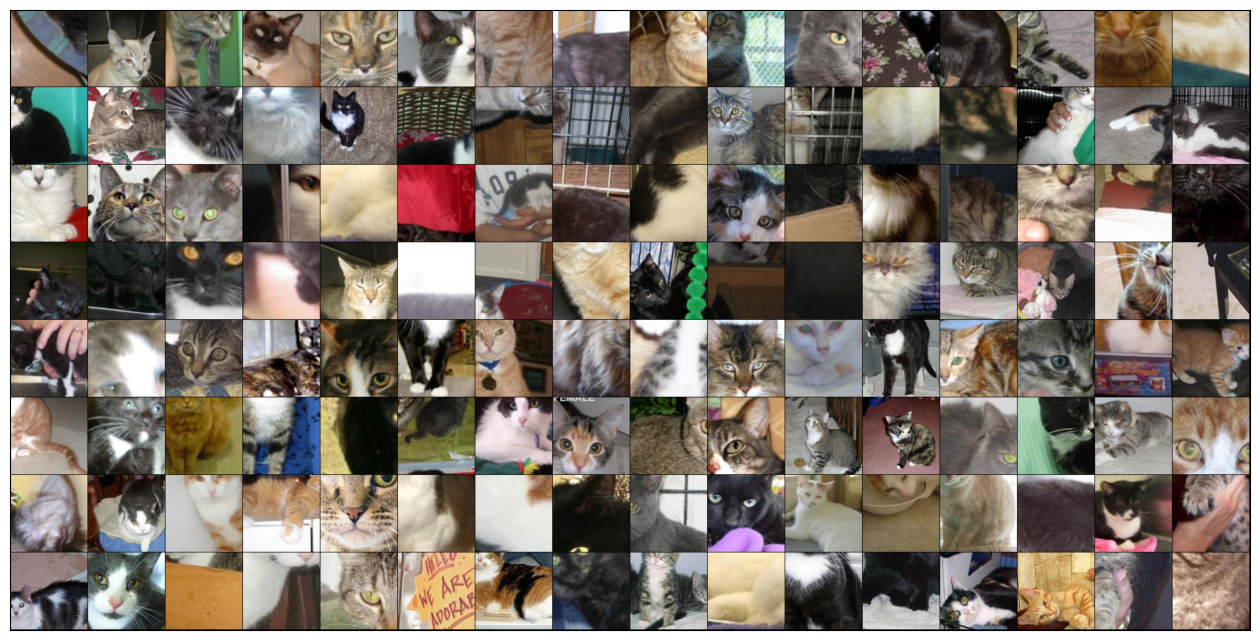

In [11]:
def show_batch(dl):
    """Plot images grid of single batch"""
    for images, labels in dl:
        fig,ax = plt.subplots(figsize = (16,12))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images,nrow=16).permute(1,2,0))
        break
        
show_batch(train_dl)

In [27]:
class CNN(nn.Module):
    #https://www.kaggle.com/code/androbomb/using-cnn-to-classify-images-w-pytorch
    def __init__(self, num_classes=3):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3, stride=1, padding=1)

        self.conv2 = nn.Conv2d(in_channels=12, out_channels=24, kernel_size=3, stride=1, padding=1)

        self.pool = nn.MaxPool2d(kernel_size=2)

        self.drop = nn.Dropout2d(p=0.2)   

        self.fc = nn.Linear(in_features=24 * 64 * 64, out_features=num_classes)

    def forward(self, x):
        x = F.relu(self.pool(self.conv1(x)))

        x = F.relu(self.pool(self.conv2(x)))

        x = F.dropout(self.drop(x), training=self.training)

        x = x.view(-1, 24 * 64 * 64)

        x = self.fc(x)
        return torch.log_softmax(x, dim=1)

device = "cpu"
if (torch.cuda.is_available()):
    device = "cuda"

model = CNN(num_classes=2).to(device)
print(model)

def train(model, device, train_loader, optimizer, epoch):
    # Set the model to train
    model.train()
    train_loss = 0
    print("Epoch: ", epoch)

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_criteria(output, target)
        train_loss += loss.item()
        loss.backward()
        optimizer.step()

        print("\tTraining batch {} Loss: {:.6f}".format(batch_idx + 1, loss.item()))

    avg_loss = train_loss / (batch_idx+1)
    print("Training set: Average loss: {:.6f}".format(avg_loss))
    return avg_loss


def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        batch_count = 0
        for data, target in test_loader:
            batch_count += 1
            data, target = data.to(device), target.to(device)

            output = model(data)

            test_loss += loss_criteria(output, target).item()

            _, predicted = torch.max(output.data, 1)
            correct += torch.sum(target == predicted).item()

    
    avg_loss = test_loss / batch_count
    print('Validation set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f})\n'.format(avg_loss, correct, len(test_loader.dataset), 100. * correct / len(test_loader.dataset)))

    return avg_loss


optimizer = optim.Adam(model.parameters(), lr=0.01)

loss_criteria = nn.CrossEntropyLoss()

epoch_nums = []
training_loss = []
validation_loss = []

epochs = 10
print("Training on", device)
for epoch in range (1, epochs + 1):
    train_loss = train(model, device, train_dl, optimizer, epoch)
    test_loss = test(model, device, test_dl)
    epoch_nums.append(epoch)
    training_loss.append(train_loss)
    validation_loss.append(test_loss)
    

CNN(
  (conv1): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop): Dropout2d(p=0.2, inplace=False)
  (fc): Linear(in_features=98304, out_features=2, bias=True)
)
Training on cuda
Epoch:  1
1
2
x.shape -  torch.Size([50, 24, 64, 64])
torch.Size([50, 2])
4
5
6
	Training batch 1 Loss: 0.660472
1
2
x.shape -  torch.Size([50, 24, 64, 64])
torch.Size([50, 2])
4
5
6
	Training batch 2 Loss: 16.396902
1
2
x.shape -  torch.Size([50, 24, 64, 64])
torch.Size([50, 2])
4
5
6
	Training batch 3 Loss: 9.149667
1
2
x.shape -  torch.Size([50, 24, 64, 64])
torch.Size([50, 2])
4
5
6
	Training batch 4 Loss: 4.453984
1
2
x.shape -  torch.Size([50, 24, 64, 64])
torch.Size([50, 2])
4
5
6
	Training batch 5 Loss: 0.982727
1
2
x.shape -  torch.Size([50, 24, 64, 64])
torch.Size([50, 2])
4
5
6
	Training batch 6 Loss: 0.567812
1
2
x.